INFO: Package PyPlot is already installed

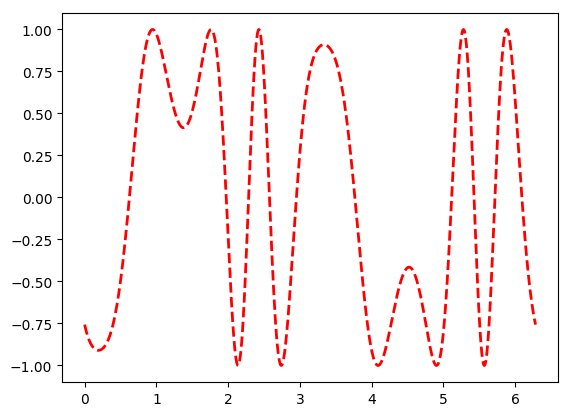


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] cos(::StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}) at ./deprecated.jl:57
 [3] include_string(::String, ::String) at ./loading.jl:515
 [4] include_string(::Module, ::String, ::String) at /home/nrw/.julia/v0.6/Compat/src/Compat.jl:464
 [5] execute_request(::ZMQ.Socket, ::IJulia.Msg) at /home/nrw/.julia/v0.6/IJulia/src/execute_request.jl:154
 [6] eventloop(::ZMQ.Socket) at /home/nrw/.julia/v0.6/IJulia/src/eventloop.jl:8
 [7] (::IJulia.##14#17)() at ./task.jl:335
while loading In[12], in expression starting on line 3


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1ce897e710>

In [12]:
Pkg.add("PyPlot")
using PyPlot
x = linspace(0,2*pi,1000); y = sin(3*x + 4*cos(2*x))
plot(x, y, color="red", linewidth=2.0, linestyle="--")



In [15]:
Pkg.add("Plots")
using Plots
plotly() # Choose the Plotly.jl backend for web interactivity
plot(rand(5,5),linewidth=2,title="My Plot")
Pkg.add("PyPlot") # Install a different backend
pyplot() # Switch to using the PyPlot.jl backend
plot(rand(5,5),linewidth=2,title="My Plot") # The same plotting command works

INFO: Package Plots is already installed


LoadError: [91mPyError (ccall(@pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, arg, kw)) <type 'exceptions.AttributeError'>
AttributeError(u'Unknown property title',)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py", line 3317, in plot
    ret = ax.plot(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py", line 1898, in inner
    return func(ax, *args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py", line 1406, in plot
    for line in self._get_lines(*args, **kwargs):
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_base.py", line 407, in _grab_next_args
    for seg in self._plot_args(remaining, kwargs):
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_base.py", line 395, in _plot_args
    seg = func(x[:, j % ncx], y[:, j % ncy], kw, kwargs)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_base.py", line 302, in _makeline
    seg = mlines.Line2D(x, y, **kw)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/lines.py", line 431, in __init__
    self.update(kwargs)
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/artist.py", line 885, in update
    for k, v in props.items()]
  File "/usr/local/lib/python2.7/dist-packages/matplotlib/artist.py", line 878, in _update_property
    raise AttributeError('Unknown property %s' % k)
[39m

In [16]:
x = 1:10; y = rand(10,2) # 2 columns means two lines
p1 = plot(x,y) # Make a line plot
p2 = scatter(x,y) # Make a scatter plot
p3 = plot(x,y,xlabel="This one is labelled",lw=3,title="Subtitle")
p4 = histogram(x,y) # Four histograms each with 10 points? Why not!
plot(p1,p2,p3,p4,layout=(2,2),legend=false)

LoadError: [91mUndefVarError: scatter not defined[39m

In [ ]:

function prm = path_planner

    # Import Obstacle Locations
    filename ='Simple2Obst.txt';
    delimiterIn = ' ';
    headerlinesIn = 0;
    rawdata = importdata(filename,delimiterIn,headerlinesIn);
    object_coord = rawdata(1:500,2);

    # Draw Course
    map = figure;
    course_outx=[-2,-4,-6,-6, 6,6,4,2];
    course_outy=[ 0, 0, 0,12,12,0,0,0];
    hold on;
    plot(course_outx,course_outy,'k','LineWidth',5);
    axis([-7,7,-6,13]);
    axis equal
    set(gca,'XTick',-13:1:13)
    set(gca,'YTick',-6:1:13)
    grid ON

    obst.ball = {};

    # Tile the obstacles with balls
    count = 1;
    for i=1:2:500
        if (object_coord(i,1)<999)

            onew.p = [object_coord(i,1);object_coord(i+1,1)];
            onew.r = 1/3;
            onew.handle = [];
            obst.ball{end+1} = onew;
            circle(onew.p(1,1),onew.p(2,1),onew.r,'b');
        end
    end


    # Set Start and Goal locations
    p_start = [0;11];
    p_goal = [0;-1];

    rob.ballradius = 0.5;
    rob.p = p_start;

    # Parameters
    param.res = 0.5;
    param.thresh = 5;
    param.maxiters = 1000;
    param.smoothiters = 150;

    circle(rob.p(1,1),rob.p(2,1),rob.ballradius,'g');
    circle(p_goal(1,1),p_goal(2,1),rob.ballradius,'r');

    # Plan the path
    P = PlanPathRRT(rob,obst,param,p_start,p_goal);

    # Plot the unsmoothed path
    for i=2:length(P)
        plot([P(1,i);P(1,i-1)],[P(2,i);P(2,i-1)],'r','LineWidth',3);
    end

    # Smooth the path
    if (~isempty(P))
        P = SmoothPath(rob,obst,param,P)
    end

    # Plot the smoothed path
    for i=2:length(P)
        plot([P(1,i);P(1,i-1)],[P(2,i);P(2,i-1)],'g','LineWidth',3);
    end
end


function h = circle(x,y,r,color)

    hold on
    th = 0:pi/50:2*pi;
    xunit = r * cos(th) + x;
    yunit = r * sin(th) + y;
    h = plot(xunit, yunit,color,'LineWidth',3);
    #hold off
end

function rrt = AddNode(rrt,p,iPrev)
    node.p = p;
    node.iPrev = iPrev;
    rrt{end+1} = node;
end

function P = PlanPathRRT(rob,obst,param,p_start,p_goal)

    global iterations
    P = [];
    rrt = {};
    rrt = AddNode(rrt,p_start,0);
    iter = 1;
    while iter <= param.maxiters
        
        if mod(iter,50) == 0
            blah=0;
        end
        
        p = rand(2,1); # random p
    #     p(1,1) = floor(p(1,1)*11-5);
    #     p(2,1) = floor(p(2,1)*16-4);
        p(1,1) = p(1,1)*10-5;
        p(2,1) = p(2,1)*15-4;
        rob.p = p;
        col = InCollision_Node(rob,obst);
        if col == 1 # skip to next iteration
    #         circle(p(1,1),p(2,1),0.1,'r');
            iter = iter + 1;
            continue
        end
        # do something if valid coordinate
        for i=1:length(rrt)
            dist = norm(rrt{i}.p - p);
            if (i==1) || (dist < mindist)
                mindist = dist;
                imin = i;
                l = rrt{i}.p;
            end
        end
        col = InCollision_Edge(rob,obst,p,l,param.res); #check for valid edge
        if col == 1 # skip to next iteration if not valid edge
    #         circle(p(1,1),p(2,1),0.1,'r');
            iter = iter + 1;
            continue 
        end
        rrt = AddNode(rrt,p,imin); # add p to T with parent l
        dist = norm(p-p_goal);
        #display(iter,dist,length(rrt))
        fprintf('Nodes:   #d, Distance: #.1f, Iterations: #d/1000\n',length(rrt),dist,iter)
    #     circle(p(1,1),p(2,1),rob.ballradius,'b');
    #     circle(p(1,1),p(2,1),0.1,'b');
        plot([p(1,1);rrt{imin}.p(1,1)],[p(2,1);rrt{imin}.p(2,1)],'m','LineWidth',3);
        if (dist < param.thresh)
            col = InCollision_Edge(rob,obst,p,p_goal,param.res); #check for valid edge
            if col == 1 # skip to next iteration if not valid edge
                iter = iter + 1;
                continue 
            end
            iterations = iter
            # add qgoal to T with parent q and exit with success
            rrt = AddNode(rrt,p_goal,length(rrt));
            # construct Q here:
            i = length(rrt);
            P(:,1) = rrt{i}.p;
            while 1
                i = rrt{i}.iPrev;
                if i == 0
                    return
                end
                P = [rrt{i}.p P];
            end
        end

        iter = iter + 1;
    end
    iterations = iter - 1

end 

function col = InCollision_Node(rob,obst)

    global checkcount;
    checkcount = checkcount + 1;
    col = 0;
    numobst = length(obst.ball);
        for j=1:numobst # check for robot-obstacle collision
            # calculate distance between ith robot ball center and jth obstacle
            # ball center
            #dist = sqrt((rob.ball{i}.p(1)-obst.ball{j}.p(1))^2+(rob.ball{i}.p(2)-obst.ball{j}.p(2))^2+(rob.ball{i}.p(3)-obst.ball{j}.p(3))^2);
            dist = norm(rob.p-obst.ball{j}.p);
            if dist < (rob.ballradius + obst.ball{j}.r)
                col = 1;
                return;
            end 
        end
end

function col = InCollision_Edge(rob,obst,p1,p2,res)

    col = 0;
    d = norm(p1 - p2);
    m = ceil(d/res);
    t = linspace(0,1,m);
    for i=2:(m-1)
        p = (1-t(i))*p1 + t(i)*p2; #calculate configuration
        rob.p = p;
        col = InCollision_Node(rob,obst); 
        if col == 1
            return;
        end
    end
end

function P = SmoothPath(rob,obst,param,P) #was SmoothPath(rob,obst,param,m,Q)
#
# INPUTS
#
#   rob - says where the robot is
#
#           NOTE: to make "rob" describe the robot at configuration
#           "something" (a column vector of length rob.n), you must call:
#
#             rob.q = something
#             rob = ForwardKinematics(rob);
#
#   obst - says where the obstacles are
#
#   param - some parameters:
#
#    param.res - resolution with which to sample straight-line paths
#    param.maxiters - maximum number of RRT iterations
#    param.thresh - distance below which a configuration is considered
#                   "close" to qgoal (called "d" in the homework)
#    param.smoothiters - maximum number of smoothing iterations
#
#   qstart, qgoal - start and goal configurations
#
# OUTPUTS
#
#   Q - a path, same format as before:
#       
#           Q = [q1 q2 q3 ... qM]
#
#               where q1=qstart and qM=qgoal; in other words, the sequence
#               of straight-line paths from q1 to q2, q2 to q3, etc., takes
#               the robot from start to goal without collision
#
# YOUR CODE HERE...
#
P = P;
[n,m] = size(P);
clearvars n;
l = zeros(m,1);
for k=2:m
    l(k)=norm(P(:,k)-P(:,k-1)) + l(k-1); # find all of the straight-line distances
end
l_init = l(m);
iter = 1;
while iter <= param.smoothiters
    s1 = rand(1,1)*l(m); 
    s2 = rand(1,1)*l(m); 
    if s2 < s1
        temps = s1;
        s1 = s2;
        s2 = temps;
    end
    for k=2:m
        if s1 < l(k)
            i = k - 1;
            break;
        end
    end
    for k=(i+1):m
        if s2 < l(k)
            j = k - 1;
            break;
        end
    end
    if (j <= i)
        iter = iter + 1;
        continue;
    end
    t1 = (s1 - l(i))/(l(i+1)-l(i));
    gamma1 = (1 - t1)*P(:,i) + t1*P(:,i+1);
    t2 = (s2 - l(j))/(l(j+1)-l(j));
    gamma2 = (1 - t2)*P(:,j) + t2*P(:,j+1);
    col = InCollision_Edge(rob,obst,gamma1,gamma2,param.res); #check for valid edge
    if col == 1
        iter = iter + 1;
        continue;
    end
    newP = [P(:,1:i) gamma1 gamma2 P(:,j+1:m)];
    clearvars P;
    P = newP;
    [n,m] = size(P);
    clearvars n;
    l = zeros(m,1);
    for k=2:m
        l(k)=norm(P(:,k)-P(:,k-1)) + l(k-1);
    end
    iter = iter + 1;
end

end